### t2.micro, AWS Marketplace -> Anaconda with Python 3

### 1) Linear Regression

Text(0, 0.5, 'y')

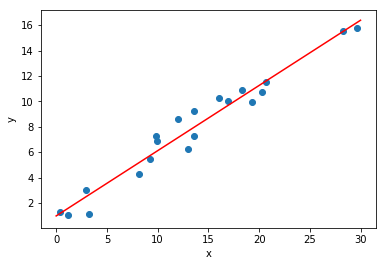

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 30 * np.random.random((20, 1))
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

model = LinearRegression().fit(x, y)

x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

plt.plot(x_new, y_new, color='red')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

### 2) Logistic Regression

Text(0, 0.5, 'y')

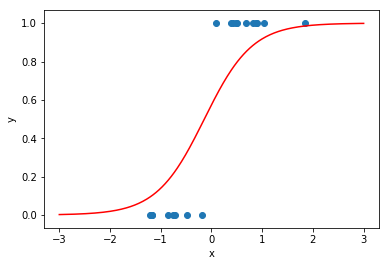

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def logit(x):
  return 1 / (1 + np.exp(-x))

x = np.random.normal(size=20)
y = (x > 0).astype(np.float)
x = x[:, np.newaxis]

model = LogisticRegression(solver='lbfgs').fit(x, y)

x_new = np.linspace(-3, 3, 300)
y_new = logit(x_new * model.coef_ + model.intercept_).ravel()

plt.plot(x_new, y_new, color='red')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

### 3) Linear Discriminant Analysis

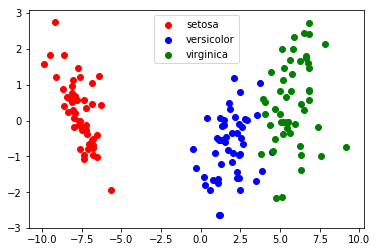

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
x    = LinearDiscriminantAnalysis().fit_transform(iris.data, iris.target)

for color, target_number, target_name in zip(
                                             ['red', 'blue', 'green'], 
                                             [0, 1, 2]               , 
                                             iris.target_names
                                            ):

    plt.scatter(
                x[iris.target == target_number, 0], 
                x[iris.target == target_number, 1], 
                color = color, 
                label = target_name
               )
plt.legend()

### 4) Decision Tree

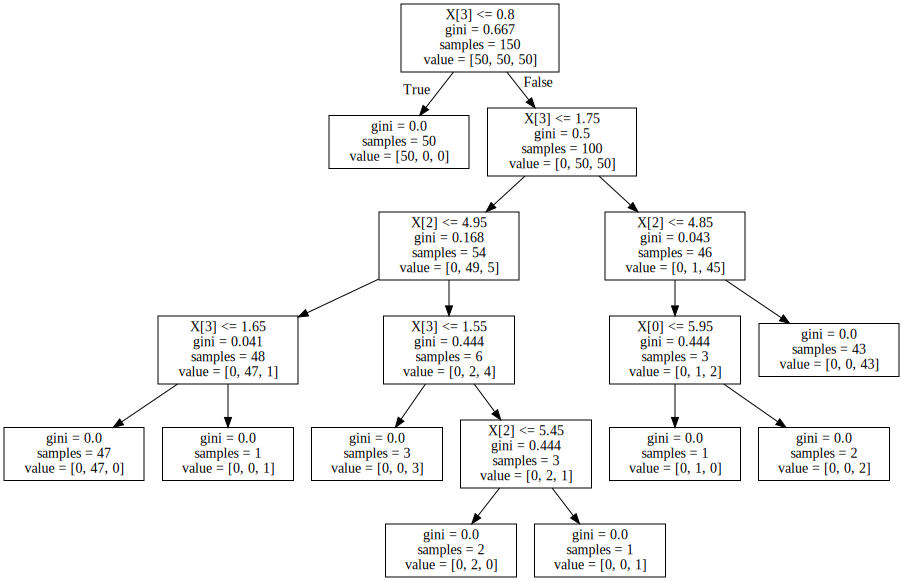

In [7]:
import graphviz
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
clf  = tree.DecisionTreeClassifier()
graphviz.Source(tree.export_graphviz(clf.fit(iris.data, iris.target)))

### 5) Naive Bayes

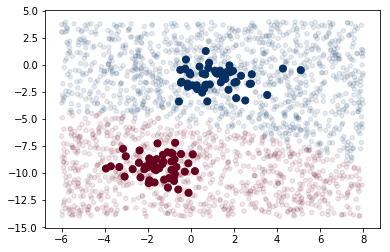

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

x, y  = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2)
model = GaussianNB().fit(x, y)

xnew = [-6, -14] + [14, 18] * np.random.RandomState().rand(2000, 2)
ynew = model.predict(xnew)

plt.scatter(x   [:, 0], x   [:, 1], c=y   , s=50, cmap='RdBu')
plt.scatter(xnew[:, 0], xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)

### 6) K-Means Clustering

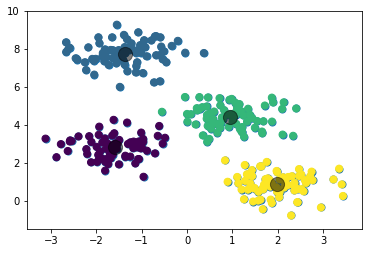

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans    = KMeans(n_clusters=4).fit(x)
y_kmeans  = kmeans.predict(x)
centers   = kmeans.cluster_centers_

plt.scatter(x[:, 0], x[:, 1], s=50);
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 7) Support Vector Machines

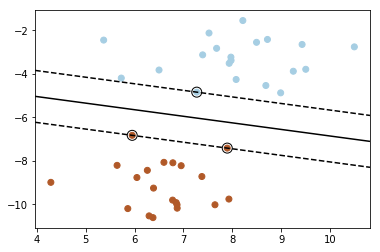

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=40, centers=2, random_state=6)
clf  = svm.SVC(kernel='linear').fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
gridx             = np.linspace(plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], 30)
gridy             = np.linspace(plt.gca().get_ylim()[0], plt.gca().get_ylim()[1], 30)
gridY, gridX      = np.meshgrid(gridy, gridx)
gridxy            = np.vstack([gridX.ravel(), gridY.ravel()]).T
decision_boundary = clf.decision_function(gridxy).reshape(gridX.shape)
plt.gca().contour(gridX, gridY, decision_boundary, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.gca().scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')